# AOU University
# WeCare: Graduation project
# Name: Mohamed Tarek Mohamed Elsaid
# ID: 2051711398
# Kidney Disease Notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
import pickle
%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("kidney_disease.csv")  
data.head()  

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.shape

(400, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

# Dealing with cat data

In [8]:
data['classification'] = data['classification'].map({'ckd':1,'notckd':0 , 'ckd\t':1})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Null values

In [10]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
data['age']=data['age'].fillna(data['age'].mean())
data=data.fillna(data.median())

In [12]:
data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [13]:
data = data.drop(["pcv","wc","rc","id"], axis = 1)  

In [14]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,138.0,4.4,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,111.0,2.5,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,138.0,4.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [15]:
n_cols = {'bp':'Blood_Pressure',
            'sg':  'Specific_Gravity','al': 'Albumin','su' : 'Sugar','bgr': 'Blood_Glucose_Random','bu' : 'Blood_Urea' ,
            'sc' : 'Serum_Creatinine','sod' : 'Sodium','pot' : 'Potassium','hemo' : 'Hemoglobin',
            'rbc' : 'Red_Blood_Cells','pc' : 'Pus_Cell','pcc' : 'Pus_Cell_Clumps','ba' : 'Bacteria','htn' : 'Hypertension', 
            'dm' : 'Diabetes_Mellitus','cad' : 'Coronary_Artery_Disease','appet' : 'Appetite','pe' : 'Pedal_Edema',
            'ane' : 'Anemia','classification' : 'Target'}

data.rename(columns=n_cols ,inplace=True)
data.head()

,age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Sodium,Potassium,Hemoglobin,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,138.0,4.4,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,111.0,2.5,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,138.0,4.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [16]:
data.isnull().sum()

age                        0
Blood_Pressure             0
Specific_Gravity           0
Albumin                    0
Sugar                      0
Red_Blood_Cells            0
Pus_Cell                   0
Pus_Cell_Clumps            0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
Target                     0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red_Blood_Cells          400 non-null    float64
 6   Pus_Cell                 400 non-null    float64
 7   Pus_Cell_Clumps          400 non-null    float64
 8   Bacteria                 400 non-null    float64
 9   Blood_Glucose_Random     400 non-null    float64
 10  Blood_Urea               400 non-null    float64
 11  Serum_Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

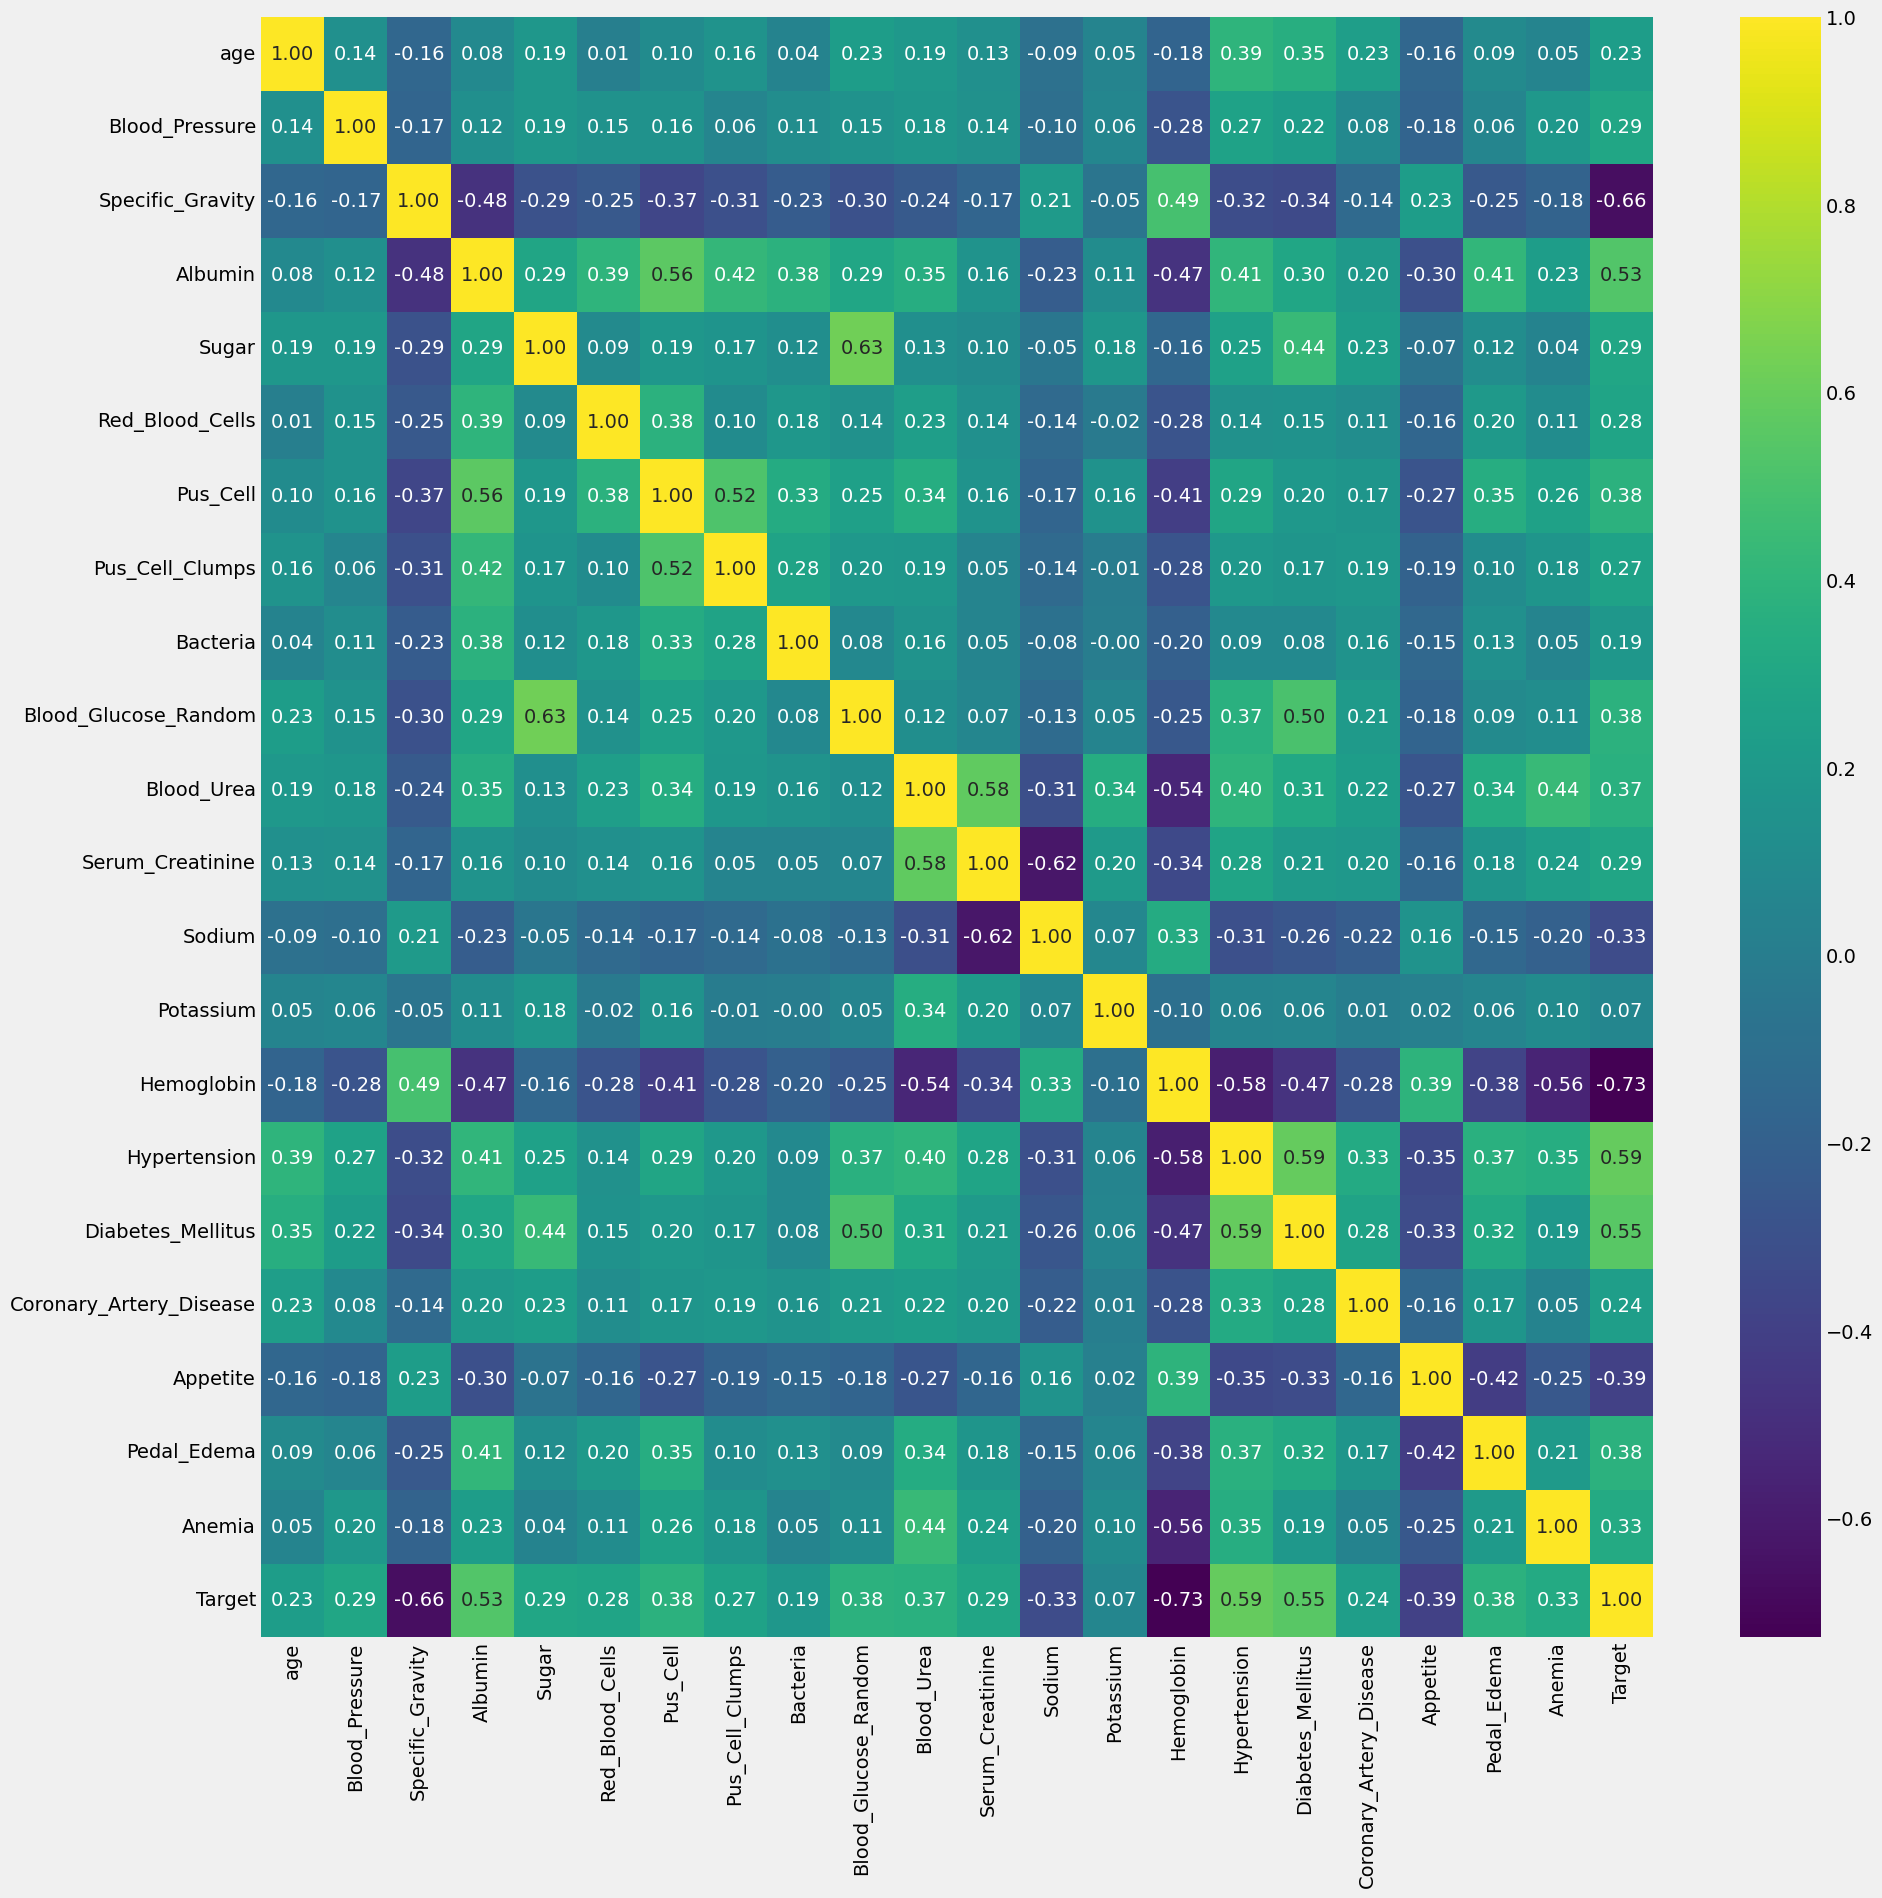

In [18]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [19]:
print(f'Good People : {data.Target.value_counts()[0]}')
print(f'Infected People : {data.Target.value_counts()[1]}')

Good People : 150
Infected People : 250


In [20]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 2.0 max = 90.0 mean = 51.483375959079275


In [21]:
#Prepare ages for a bie chart
Young = data[(data.age>=2)&(data.age<30)]
Middle = data[(data.age>=30)&(data.age<51)]
Old = data[(data.age>51)]

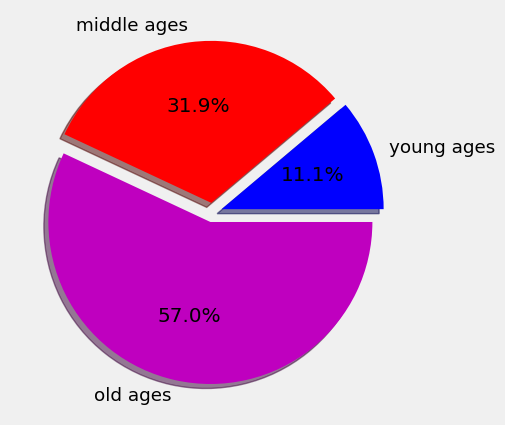

In [22]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.06,0.06,0.06]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

In [23]:
data.head()

,age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Sodium,Potassium,Hemoglobin,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,138.0,4.4,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,138.0,4.4,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,111.0,2.5,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,138.0,4.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1


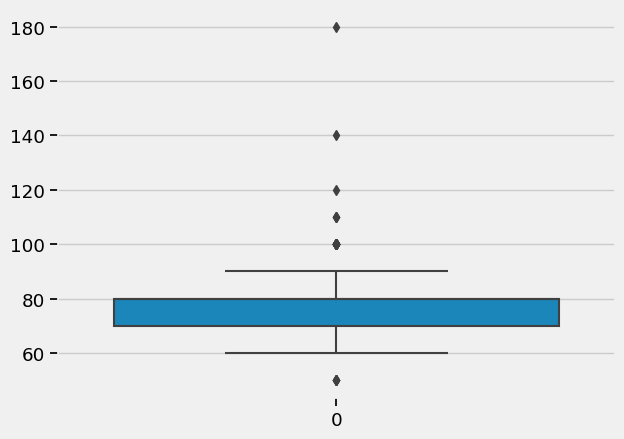

In [24]:
#outliers
sns.boxplot(data['Blood_Pressure'])
plt.show()

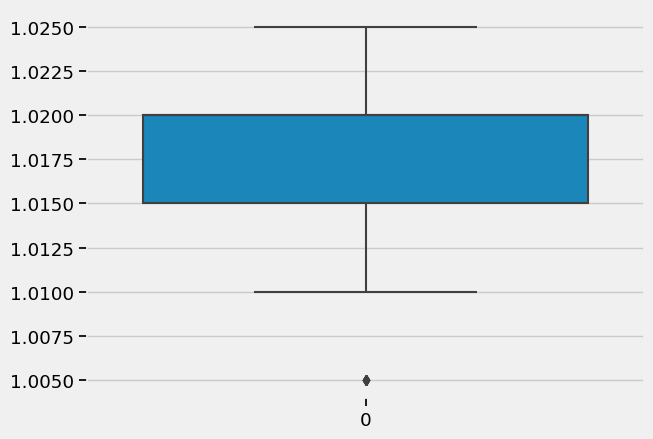

In [25]:
#outliers
sns.boxplot(data['Specific_Gravity'])
plt.show()

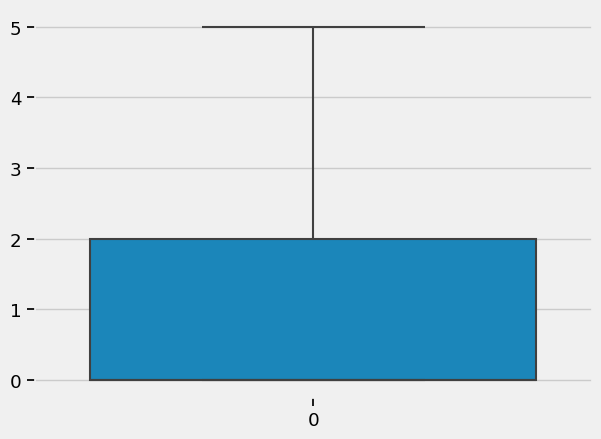

In [26]:
#outliers
sns.boxplot(data['Albumin'])
plt.show()

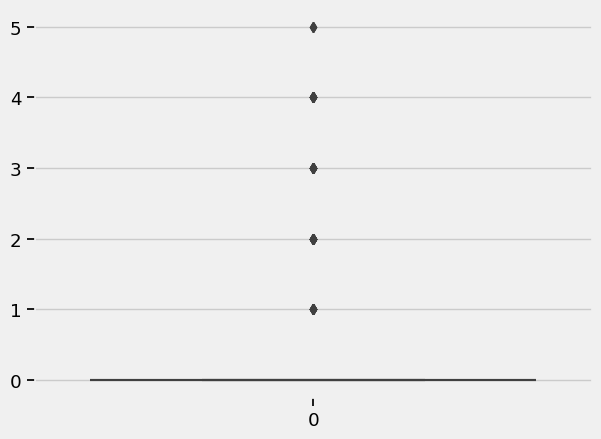

In [27]:
#outliers
sns.boxplot(data['Sugar'])
plt.show()

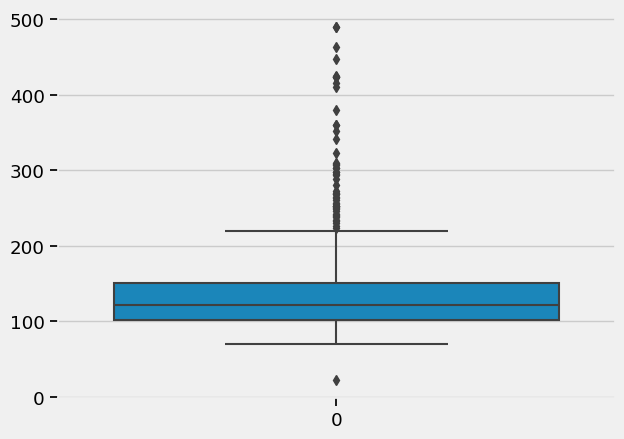

In [28]:
#outliers
sns.boxplot(data['Blood_Glucose_Random'])
plt.show()

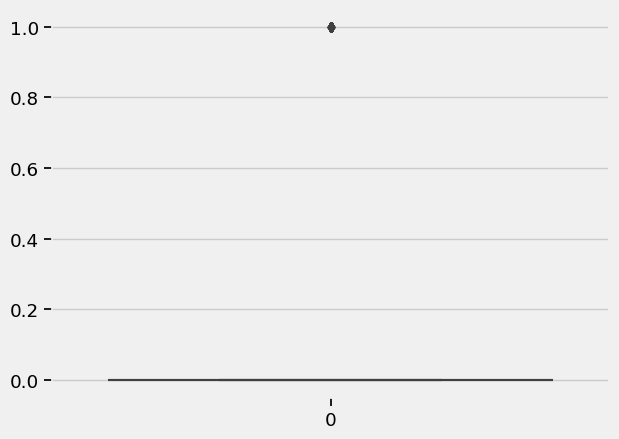

In [29]:
#outliers
sns.boxplot(data['Pus_Cell'])
plt.show()

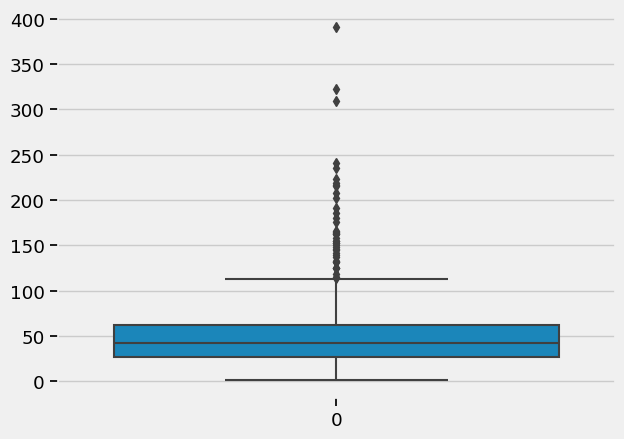

In [30]:
#outliers
sns.boxplot(data['Blood_Urea'])
plt.show()

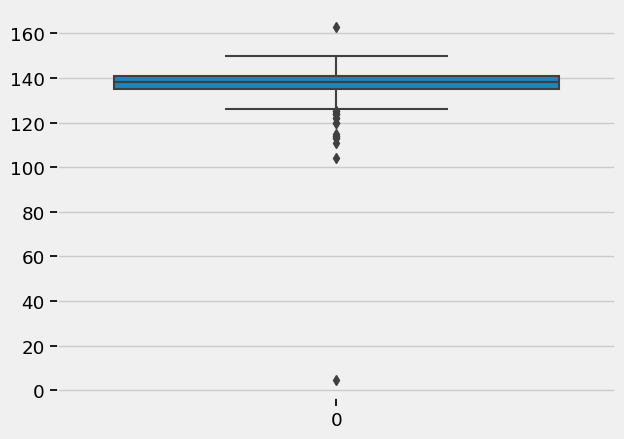

In [31]:
#outliers
sns.boxplot(data['Sodium'])
plt.show()

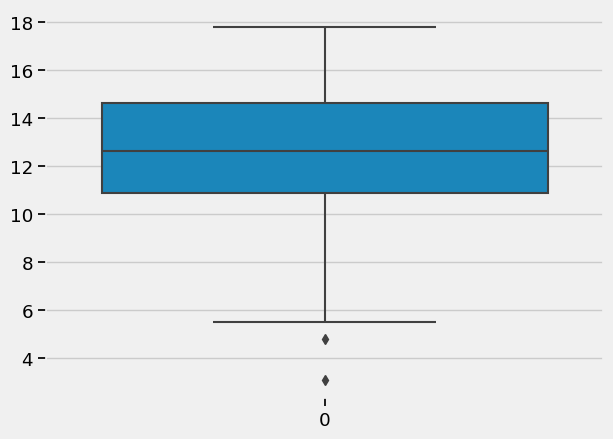

In [32]:
#outliers
sns.boxplot(data['Hemoglobin'])
plt.show()

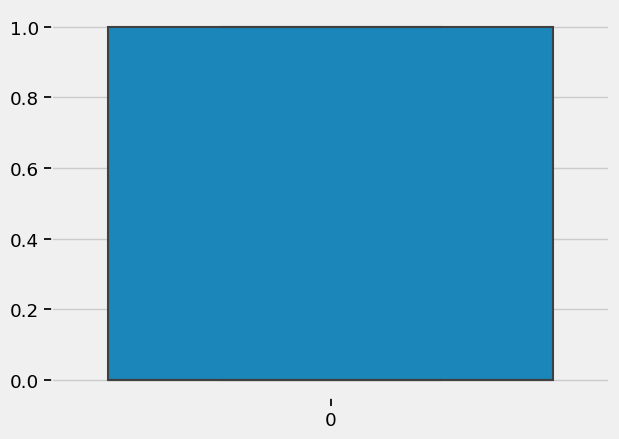

In [33]:
#outliers
sns.boxplot(data['Hypertension'])
plt.show()

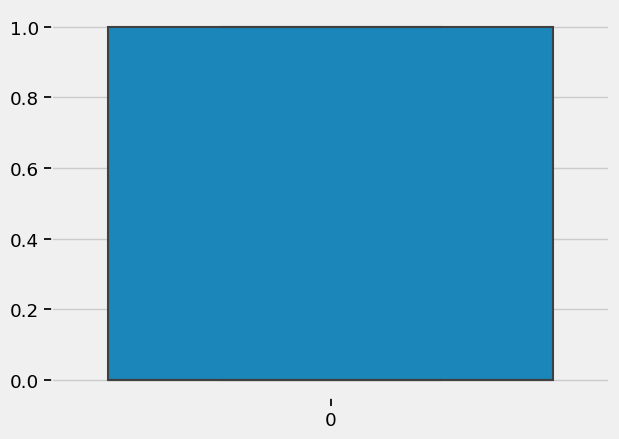

In [34]:
#outliers
sns.boxplot(data['Diabetes_Mellitus'])
plt.show()

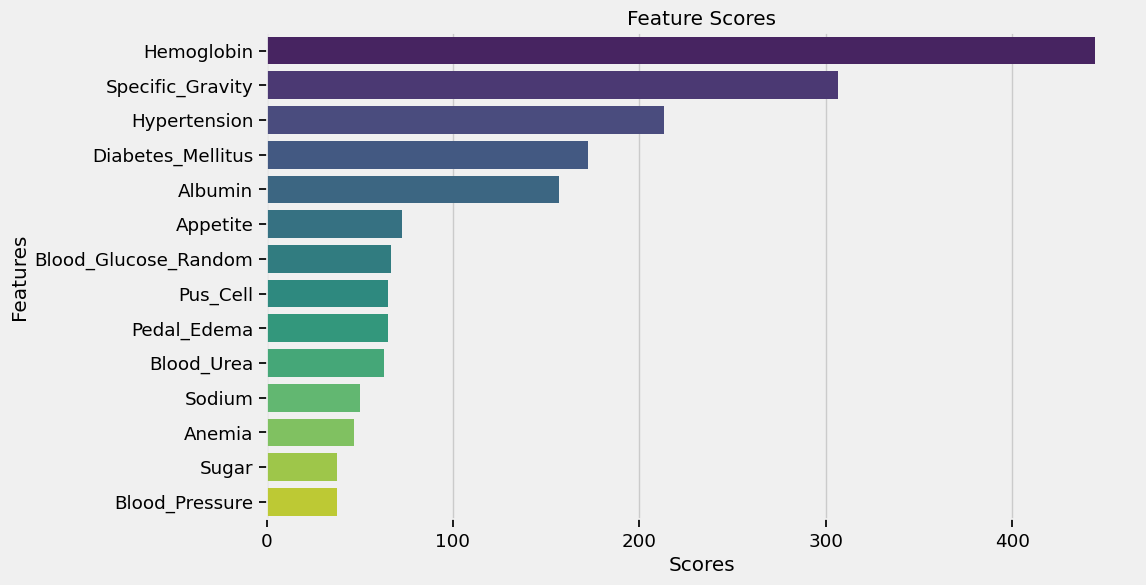

In [35]:
# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["Target"], axis = 1) 
y = data["Target"]
selector = SelectKBest(f_classif, k=14)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# Feature Selection

In [36]:
# Splitting the data  
X = X.drop(["age","Red_Blood_Cells","Pus_Cell_Clumps",
               "Serum_Creatinine","Potassium","Coronary_Artery_Disease",
               "Bacteria","Potassium","Coronary_Artery_Disease"], axis = 1)  

In [37]:
X.columns

Index(['Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Pus_Cell',
       'Blood_Glucose_Random', 'Blood_Urea', 'Sodium', 'Hemoglobin',
       'Hypertension', 'Diabetes_Mellitus', 'Appetite', 'Pedal_Edema',
       'Anemia'],
      dtype='object')

In [38]:
X.head()

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Pus_Cell,Blood_Glucose_Random,Blood_Urea,Sodium,Hemoglobin,Hypertension,Diabetes_Mellitus,Appetite,Pedal_Edema,Anemia
0,80.0,1.020,1.0,0.0,0.0,121.0,36.0,138.0,15.4,1.0,1.0,1.0,0.0,0.0
1,50.0,1.020,4.0,0.0,0.0,121.0,18.0,138.0,11.3,0.0,0.0,1.0,0.0,0.0
2,80.0,1.010,2.0,3.0,0.0,423.0,53.0,138.0,9.6,0.0,1.0,0.0,0.0,1.0
3,70.0,1.005,4.0,0.0,1.0,117.0,56.0,111.0,11.2,1.0,0.0,0.0,1.0,1.0
4,80.0,1.010,2.0,0.0,0.0,106.0,26.0,138.0,11.6,0.0,0.0,1.0,0.0,0.0


In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Target, Length: 400, dtype: int64

In [40]:
# scale=MinMaxScaler()
# scale.fit(X)

In [41]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [42]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [43]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [44]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Confution matrix for model KNeighborsClassifier(metric='manhattan', n_neighbors=3) : 
 [[43  1]
 [13 63]]
Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=3) :  0.8833333333333333
classification_report for model KNeighborsClassifier(metric='manhattan', n_neighbors=3) : 
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        44
           1       0.98      0.83      0.90        76

    accuracy                           0.88       120
   macro avg       0.88      0.90      0.88       120
weighted avg       0.90      0.88      0.89       120



# Random Forest Using Grid Search

In [45]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [46]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

# Best Model for Kidney

In [47]:
print("Random Forest Best parameters: ", grid_forest.best_params_)

Random Forest Best parameters:  {'max_depth': 6, 'n_estimators': 3}


In [48]:
ac_rnf = accuracy_score(y_test, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_test, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=3) :  0.9916666666666667
classification_report for model RandomForestClassifier(max_depth=6, n_estimators=3) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



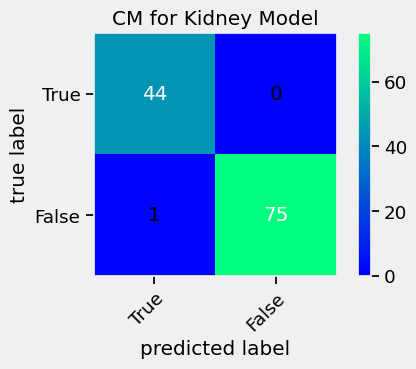

In [49]:
cm_rnf = confusion_matrix(y_test, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf,
                                show_absolute=True,
                                colorbar=True,
                                cmap='winter',
                                class_names = [True , False ],
                                figsize=(5, 3))
plt.title("CM for Kidney Model")
plt.show()

In [50]:
print(best_model_rnf.score(X_train,y_train))

0.9857142857142858


In [51]:
print(best_model_rnf.score(X_test,y_test))

0.9916666666666667


In [52]:
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)

Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=3) :  0.8833333333333333
Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=3) :  0.9916666666666667


In [53]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred_final = best_model_rnf.predict(X_test)
X_test['predictions'] = y_pred_final 

In [54]:
X_test.head(3)

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Pus_Cell,Blood_Glucose_Random,Blood_Urea,Sodium,Hemoglobin,Hypertension,Diabetes_Mellitus,Appetite,Pedal_Edema,Anemia,predictions
209,70.0,1.02,0.0,0.0,0.0,121.0,42.0,138.0,11.5,0.0,0.0,1.0,0.0,0.0,0
280,80.0,1.02,0.0,0.0,0.0,93.0,33.0,144.0,13.3,0.0,0.0,1.0,0.0,0.0,0
33,100.0,1.02,2.0,0.0,1.0,140.0,55.0,138.0,10.1,1.0,0.0,0.0,0.0,0.0,1


# Test my Model with new dataset

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 250), (1, 250)]


In [56]:
y_pred_rnf=best_model_rnf.predict(X_resampled)

In [57]:
ac_rnf = accuracy_score(y_resampled, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_resampled, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=3) :  0.99
classification_report for model RandomForestClassifier(max_depth=6, n_estimators=3) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.98      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



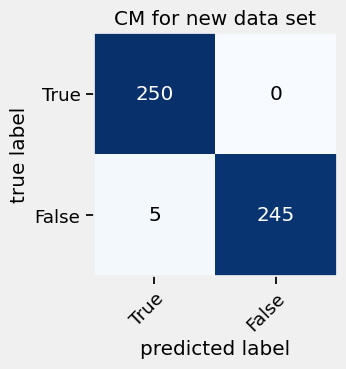

In [58]:
cm_rnf = confusion_matrix(y_resampled, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

# Saving the model

In [60]:
pickle.dump(best_model_rnf, open('Kmodel.pkl' , 'wb'))
model = pickle.load(open('Kmodel.pkl' , 'rb'))